In [5]:
%matplotlib inline
import matplotlib
import pandas as pd
import emsalib as emsa
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [6]:
dataset_path = 'data/Alice.csv'
header = pd.read_csv(dataset_path, nrows=1, header=None)
header = header.values[0]
alice = pd.read_csv(dataset_path)

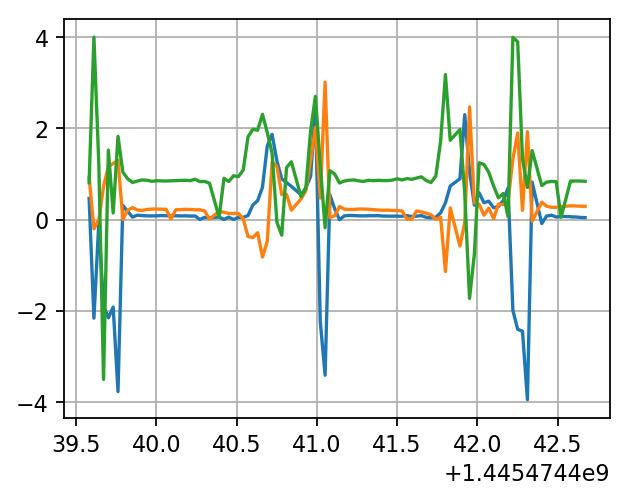

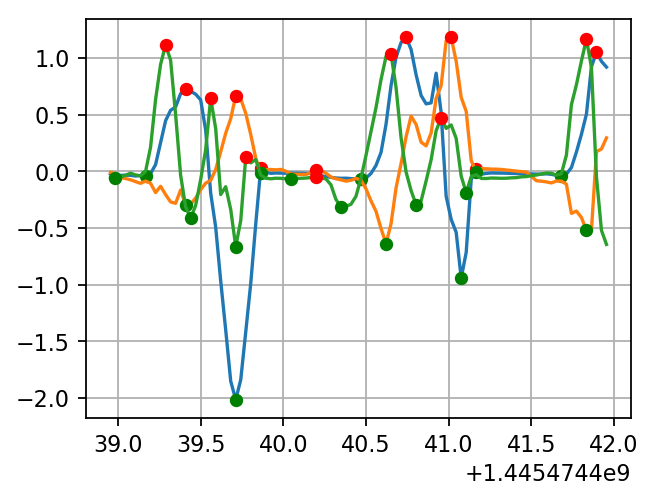

In [7]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]

axis[0] = emsa.TimeSeries(ts=ts, ys=axis[0])
axis[1] = emsa.TimeSeries(ts=ts, ys=axis[1])
axis[2] = emsa.TimeSeries(ts=ts, ys=axis[2])

emsa0 = emsa.EMSA(flt_type='ma', filterLen = 5)

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

[emsa0.process(a) for a in axis]

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

In [1]:
motifs = []
for i in range(len(peaks_idx)-1):
    motifs.append(Motif(ts_new[peaks_idx[i]:peaks_idx[i+1]], axis_lpf[0][peaks_idx[i]:peaks_idx[i+1]]))
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.grid()
for i in range(len(motifs)):
    motifs[i].plot()


NameError: name 'peaks_idx' is not defined